In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

## KNN

In [6]:
X = digits.data
y = digits.target

# you can choose any random_state, 
# however, if you want to get the same result from two execution times, you need to choose the same random_state
# if not, it may give you another result. it plays the same role as 'seed' in random() function Random state ensures 
# that the splits that you generate are reproducible. so you can change the random_state to let it shuffle and split 
# it into another subset. sometimes, you want to test if your model works the same with a setting, so you choose a fix 
# random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# the parameter n_neighbors especifies the number of neighbors you want for this model.
knn = KNeighborsClassifier(n_neighbors=1)

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [10]:
# predictions will be generated based on the features from the X_test
pred = knn.predict(X_test)
pred

array([5, 2, 8, 1, 7, 2, 6, 2, 6, 5, 0, 5, 9, 3, 4, 4, 2, 4, 9, 9, 6, 3,
       8, 1, 2, 5, 6, 0, 3, 4, 6, 7, 2, 6, 6, 6, 6, 5, 0, 9, 1, 7, 9, 6,
       5, 7, 5, 2, 7, 5, 0, 1, 5, 5, 3, 2, 4, 0, 0, 2, 7, 5, 6, 1, 3, 7,
       6, 5, 7, 0, 9, 0, 3, 8, 2, 5, 8, 2, 3, 5, 9, 3, 2, 7, 9, 6, 8, 1,
       0, 1, 2, 9, 4, 4, 1, 2, 7, 8, 4, 2, 6, 8, 3, 7, 3, 9, 6, 1, 1, 0,
       9, 2, 1, 6, 3, 4, 8, 7, 1, 0, 0, 4, 6, 5, 8, 2, 8, 1, 3, 0, 0, 8,
       6, 4, 3, 9, 3, 3, 3, 3, 0, 7, 0, 0, 1, 9, 5, 8, 1, 5, 0, 6, 6, 6,
       6, 1, 7, 7, 6, 7, 7, 8, 7, 3, 6, 5, 9, 0, 3, 8, 0, 9, 8, 1, 9, 5,
       9, 5, 8, 9, 9, 7, 9, 1, 9, 5, 4, 7, 3, 0, 4, 9, 7, 7, 5, 6, 5, 8,
       3, 4, 5, 4, 9, 2, 5, 5, 2, 1, 3, 8, 8, 9, 3, 6, 1, 0, 1, 4, 0, 5,
       5, 6, 6, 7, 4, 3, 8, 4, 1, 0, 7, 9, 2, 1, 4, 8, 4, 2, 4, 0, 0, 0,
       2, 6, 7, 0, 4, 5, 2, 2, 9, 0, 4, 6, 8, 2, 3, 9, 2, 3, 0, 6, 8, 7,
       1, 4, 4, 1, 1, 6, 3, 8, 1, 2, 5, 7, 8, 3, 2, 0, 3, 4, 1, 9, 9, 9,
       6, 3, 7, 1, 6, 9, 4, 7, 1, 8, 1, 3, 0, 5, 3,

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
#Now we can see how similar the predictions were compared to the expected results (y_test)
print(confusion_matrix(y_test,pred))

confusion_matrix

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  1  0  0  0  1 34]]


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)>

In [13]:
print(classification_report(y_test,pred))

# It looks like the model is pretty good already with K=1.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [14]:
##### We will check any possible value for K between 1 and 9.
# For each of those values I will call the KNeighborsClassifier to create a model for that value.
# Then I will fit that model to my training set.
# Finally, I will find the average accuracy of that model, which is the average of where my predictions were not 
# equal to the actual test values (it sum up all the times that the prediction did not match the expected y_test value 
# and divide by the total number of times that the test was performed. By doing so, I find the average error. Then, I
# subtract this value from 1 and I will have the accuracy).
# Then I will add the average accuracy to the accuracy list.


accuracy_test = []
accuracy_train = []

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

    # getting the accuracy score for the train set.
    score_train = knn.score(X_train, y_train) 
    accuracy_train.append(score_train)
    
    # getting the accuracy score for the test set.
    score_test = knn.score(X_test, y_test) 
    accuracy_test.append(score_test)
    


Text(0, 0.5, 'Accuracy')

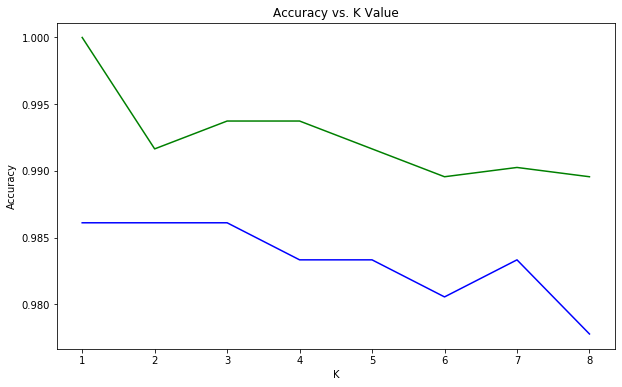

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,9),accuracy_test,color='blue', linestyle='-', label = 'Test Accuracy')
plt.plot(range(1,9),accuracy_train,color='green', linestyle='-', label = 'Train Accuracy')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [16]:
# #Tutor's solution
# neighbors = np.arange(1,9)
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

# for i, k in enumerate(neighbors):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     train_accuracy[i] = knn.score(X_train, y_train)
#     test_accuracy[i] = knn.score(X_test, y_test)
    
# plt.title('K-NN: Varying Number of Neighbors')
# plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
# plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
# plt.legend()
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Accuracy')
# plt.show()

In [17]:
# Checking again what's the accuracy when K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=1


[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  1  0  0  0  1 34]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   mac

In [18]:
# Now if I try to make K=6...
# NOW WITH K=6, I have an increase of 1% of chances of getting the class right.
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



WITH K=6


[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  1 31  0]
 [ 0  0  0  0  1  0  0  0  1 34]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   mac

## Support Vector Machine

In [19]:
# # importing SVM model
from sklearn import svm
from sklearn import metrics

In [20]:
# Create a list with various types of kernel that will be tested inside the for loop.
types = ['linear', 'poly', 'rbf']

# Initiate a variable called higher_accuracy with value zero in order to keep the highest accuracy value 
# inside the for loop.
higher_accuracy = 0

for i in types:

    # Create a svm Classifier    
    clf = svm.SVC(kernel = i)

    # Train the model using the training sets
    clf.fit(X_train, y_train)

    # predict the results for the test set
    y_pred = clf.predict(X_test)

    # generate the metrics report, save it inside a variable and set output_dict as true in order to grab the value of
    # the key 'accuracy', which represents the accuracy of the kernel being evaluated.
    
    d = metrics.classification_report(y_test, y_pred, output_dict=True)
    accuracy = d['accuracy']
    if accuracy > higher_accuracy:
        higher_accuracy = accuracy
        best_kernel = i
accuracy_svm = higher_accuracy
print('\n')
print(f"The accuracy of SVM classifier is {higher_accuracy} and the best kernel is {best_kernel}.")




The accuracy of SVM classifier is 0.9916666666666667 and the best kernel is rbf.


# Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sns


In [22]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)
pred_3 = nbc.predict(X_test)
matrix_nbc = confusion_matrix(y_test,pred_3)

In [23]:
matrix_nbc

array([[33,  0,  0,  0,  1,  1,  0,  0,  1,  0],
       [ 0, 29,  1,  0,  0,  0,  1,  0,  3,  2],
       [ 0,  3, 19,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  1, 26,  0,  0,  0,  1,  8,  1],
       [ 0,  2,  0,  0, 26,  0,  1,  6,  1,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 35,  0,  0],
       [ 0,  4,  1,  0,  0,  0,  0,  1, 29,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  4,  3, 25]])

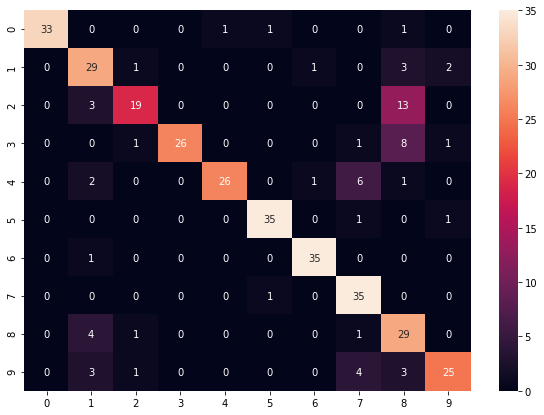

In [24]:
df_nbc = pd.DataFrame(matrix_nbc, index = np.arange(0,10),
                      columns = np.arange(0,10))
plt.figure(figsize = (10,7))
sns.heatmap(df_nbc, annot=True)

In [25]:
accuracy_nbc = nbc.score(X_test, y_test)
accuracy_nbc
print(f"The accuracy of Naive Bayes classifier is {accuracy_nbc}.")

The accuracy of Naive Bayes classifier is 0.8111111111111111.


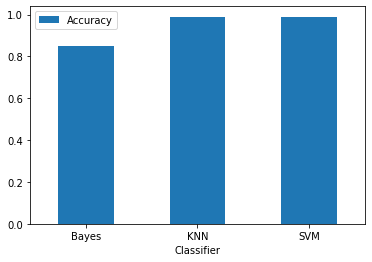

In [26]:
df_classifiers = pd.DataFrame({'Classifier':['Bayes', 'KNN', 'SVM'], 'Accuracy':[0.85, 0.99, 0.99]})
ax = df_classifiers.plot.bar(x='Classifier', y='Accuracy', rot=0) # rot=0 puts the labels on the x axis writen on horizontal.